## NOTES

* 資料前處理:一定要先確認Raw Data是正確的

* 資料預處理的目的，就是在收集資料之後、開始進行分析之前，先行經過整理、清除，讓我們所使用的資料能有一定的可信度。這項工作是很重要的，因為資料分類與處理的品質，將會影響最後數據分析的結果。
-> 避免garbage in,garbage out

1.data cleaning noise, outlier, redundant data, missing values, ...
2.data integration
3.data transformation:資料轉換包含透過標準化及正規化的資料插補、資料分割和轉換
4.dimensionality reduction

* Scatter Plot散佈圖:兩個連續變數
* HeatMap:連續型變數之相關性
若相關係數<0.2 -> 可能需要資料整合或其他調整
* lmplot:回歸圖


In [ ]:
df1['A'].plot.hist(bins=50) # bins:可以調整看細節

In [ ]:
df2.plot.bar(stacked=True) # stacked:疊加

In [ ]:
df2['a'].sort_values(ascending=False).plot(kind='bar') #先排序再畫圖(也可以一個指令一個指令打)

In [ ]:
tips.groupby(['smoker','sex']).size().unstack(1).plot(kind='bar') #分有無吸菸，再分男女

In [ ]:
plt.figure(figsize=(12,3)) #圖的外框大小
sns.countplot(x='sex',data=tips) #指令

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm") #hue:拆有無抽菸

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True) #annot=True:顯示數字

## Exercise

使用TITANIC的資料繪圖

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


繪製age的直方圖, 區間值設為30

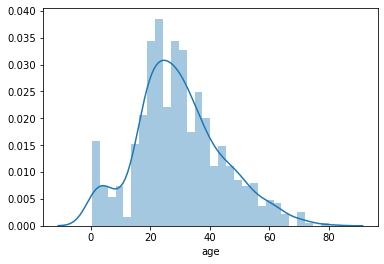

In [9]:
sns.distplot( df['age'], bins=30)

製作survived和sex的交叉表

In [16]:
cross=pd.crosstab(df['survived'], df['sex'])
cross

#df.groupby(['survived','sex'])['survived'].count()

sex,female,male
survived,,
0,81,468
1,233,109


將結果製成圖

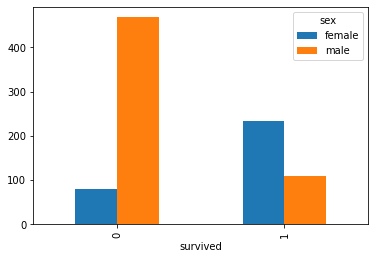

In [23]:
df.groupby(['survived','sex']).size().unstack(1).plot(kind='bar')

製作survived和age的圖。將依存活與否分成兩組，再將兩組的資料分別用直方圖來呈現。畫在同一格表格上

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

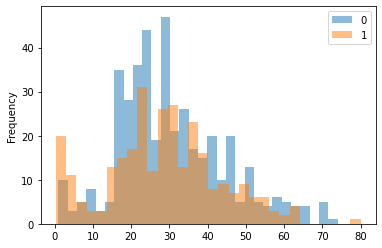

In [26]:
df.groupby('survived')['age'].plot(kind='hist', bins=30, alpha=0.5, legend=True)

用箱型圖來呈現

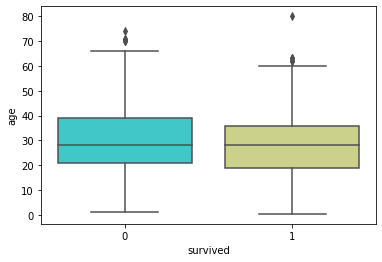

In [3]:
sns.boxplot(x='survived',y='age',data=df,palette='rainbow')

自由發揮, 至少再繪製3個不同的圖,並解釋其用意

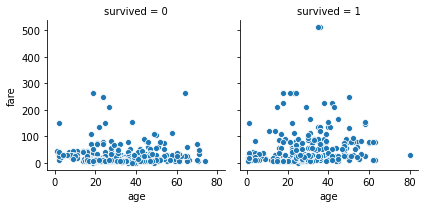

In [41]:
g = sns.FacetGrid(data=df, col='survived')
g = g.map(sns.scatterplot,'age','fare')

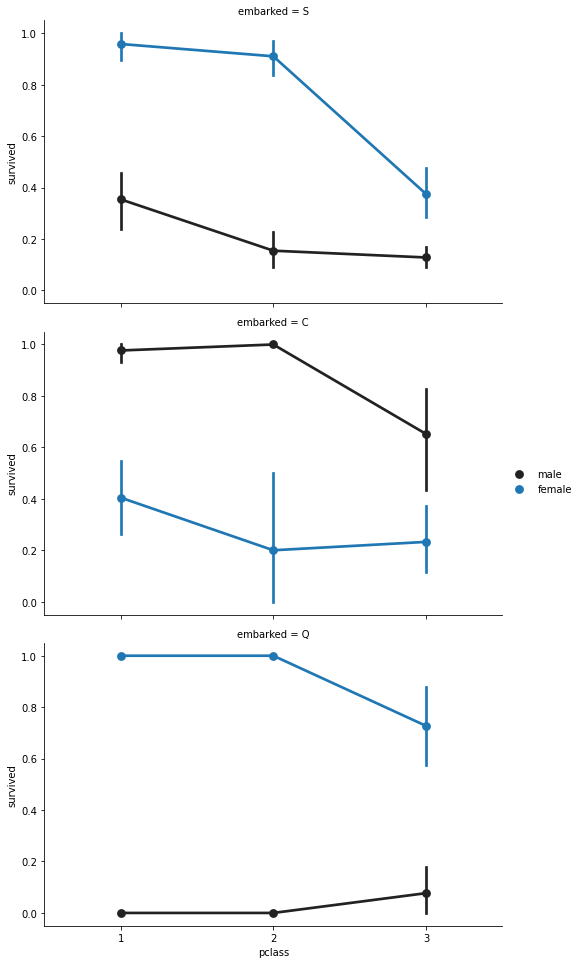

In [46]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None )
FacetGrid.add_legend()

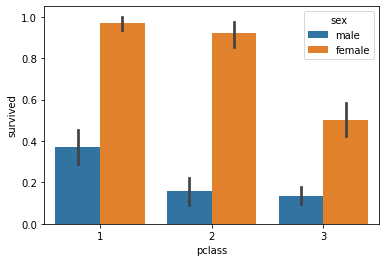

In [31]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

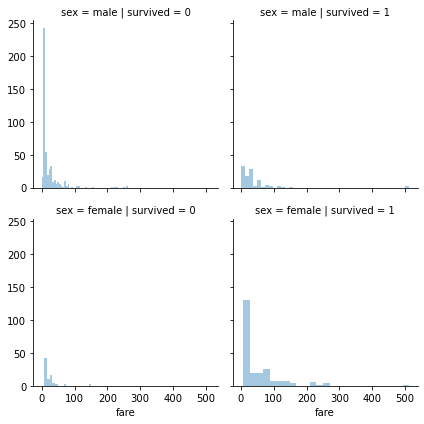

In [39]:
g = sns.FacetGrid(data=df, col='survived', row='sex')
g = g.map(sns.distplot,'fare', kde=False)
